In [1]:
import sys 

import pyccl as ccl

In [2]:
fiducial_h = 0.6736

#(Same as above but put in DES Y3 OmegaM and Sigma8)
Ωmh2 =  0.339*fiducial_h**2 # Y3 3x2pt
Ωνh2 = 0.06/(93.14)
#From the BBN seciton of DES Y3 paper
Ωbh2 = 2.195/100
Ωch2 = Ωmh2-Ωbh2-Ωνh2
fiducial_cosmology = {'10^9 As': -1 , 
                      'ns': 0.9649,
                      'H0': 67.36,
                      'w0': -1,
                      'ombh2': Ωbh2,
                      'omch2': Ωch2,
                      'nu_mass_ev': 0.06,}

In [3]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
cosmo.sigma8()

0.8402187282371845

In [4]:
target_sigma8 = 0.733


curr_val = 2.1
A_s = curr_val * 1e-9
cosmo = ccl.Cosmology(Omega_c=0.339, Omega_b=0.045, h=0.67, sigma8=0.733, n_s=0.96)

In [5]:
0.02237/0.6736**2

0.049301692328524445

In [6]:
def calculate_sigma8(curr_val):
    A_s = curr_val * 1e-9
    cosmo = ccl.Cosmology(Omega_c=fiducial_cosmology['omch2']/fiducial_h**2, 
                          Omega_b=fiducial_cosmology['ombh2']/fiducial_h**2, 
                          h=fiducial_h, A_s=A_s, n_s=0.9649, m_nu=0.06)
    return cosmo.sigma8()



target_sigma8 = 0.733 #DES Y3 3x2pt
lower_bound = 0
upper_bound = 5
tolerance = 1e-6


while(upper_bound - lower_bound > tolerance):
    curr_val = (lower_bound + upper_bound) / 2
    current_sigma8 = calculate_sigma8(curr_val)
    
    if current_sigma8 < target_sigma8:
        lower_bound = curr_val
    else:
        upper_bound = curr_val

    print("Current value: %.6f, Current sigma8: %.6f" % (curr_val, current_sigma8))

final_curr_val = (lower_bound + upper_bound) / 2
final_sigma8 = calculate_sigma8(final_curr_val)

print("\nFinal result:")
print("curr_val: %.6f" % final_curr_val)
print("sigma8: %.6f" % final_sigma8)
print("target_sigma8: %.6f" % target_sigma8)
print("Difference: %.9f" % abs(final_sigma8 - target_sigma8))

Current value: 2.500000, Current sigma8: 0.939801
Current value: 1.250000, Current sigma8: 0.664540
Current value: 1.875000, Current sigma8: 0.813892
Current value: 1.562500, Current sigma8: 0.742978
Current value: 1.406250, Current sigma8: 0.704851
Current value: 1.484375, Current sigma8: 0.724166
Current value: 1.523438, Current sigma8: 0.733632
Current value: 1.503906, Current sigma8: 0.728914
Current value: 1.513672, Current sigma8: 0.731277
Current value: 1.518555, Current sigma8: 0.732456
Current value: 1.520996, Current sigma8: 0.733044
Current value: 1.519775, Current sigma8: 0.732750
Current value: 1.520386, Current sigma8: 0.732897
Current value: 1.520691, Current sigma8: 0.732971
Current value: 1.520844, Current sigma8: 0.733007
Current value: 1.520767, Current sigma8: 0.732989
Current value: 1.520805, Current sigma8: 0.732998
Current value: 1.520824, Current sigma8: 0.733003
Current value: 1.520815, Current sigma8: 0.733001
Current value: 1.520810, Current sigma8: 0.732999


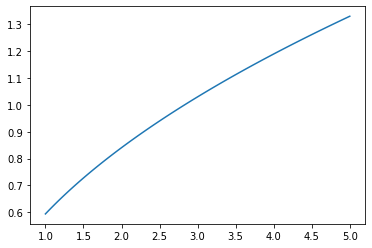

In [7]:
import numpy as np
import matplotlib.pyplot as plt
As_s = np.linspace(1,5, 100)
sigma8_s = list(map(calculate_sigma8, As_s))
plt.plot(As_s, sigma8_s)